In [88]:
from pycaret.classification import *
from pycaret.classification import setup
import pandas as pd

In [89]:
data = pd.read_csv(r"C:\Users\NT550-052\OneDrive\바탕 화면\ASAC\프로젝트\ML\web_crawling\CGW\modeling\clstandoh\clusterandoh2.csv",sep=";")
data.drop(columns="Unnamed: 0",inplace=True)
data

,appid,24_Hour_Peak,All_time_peak,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,genre,...,videoproduction,violent,webpublishing,c0,c1,c2,c3,c4,c5,c6
0,294100,20930,60742,12492,1401,5368,921,34.99,34.99,"Indie, Simulation, Strategy",...,0,0,0,0,0,3,0,0,0,0
1,960090,13428,53891,4018,277,1532,62,13.99,13.99,Strategy,...,0,0,0,0,0,1,0,0,0,0
2,504230,1234,4148,1316,310,370,582,19.99,19.99,"Action, Adventure, Indie",...,0,0,0,0,0,3,0,0,0,0
3,588650,4553,14880,1841,183,868,213,14.99,24.99,"Action, Adventure, Indie",...,0,0,0,0,0,3,0,0,0,0
4,264710,4205,50876,1943,313,941,277,29.99,29.99,"Adventure, Indie",...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46247,1995280,0,0,0,0,0,0,14.99,14.99,"Adventure, Indie",...,0,0,0,0,0,2,0,0,0,0
46248,2098860,0,0,0,0,0,0,9.99,9.99,"Adventure, Casual",...,0,0,0,0,0,2,0,0,0,0
46249,2154770,814,1176,0,0,0,0,0.00,0.00,N,...,0,0,0,0,0,0,1,0,0,0
46250,1915410,0,1,0,0,0,0,2.99,2.99,"Action, Indie",...,0,0,0,0,0,2,0,0,0,0


In [90]:
data["months_after_release"] = data["days_after_release"]//30

In [91]:
data.columns

Index(['appid', '24_Hour_Peak', 'All_time_peak', 'average_forever',
       'average_2weeks', 'median_forever', 'median_2weeks', 'price',
       'initialprice', 'genre', 'num_lang', 'required_age', 'is_free',
       'controller_support', 'dlc', 'metacritic_tf', 'windows', 'mac', 'linux',
       'platforms_num', 'achievements', 'days_after_release', 'Review',
       'months_after_release', '360v', 'accounting', 'action', 'actiongames',
       'adventure', 'animation', 'audioproduction', 'casual', 'design',
       'documentary', 'earlyaccess', 'education', 'episodic', 'freetoplay',
       'gamedevelopment', 'gore', 'illustration', 'indie',
       'massivelymultiplayer', 'modeling', 'movie', 'nudity', 'photoediting',
       'racing', 'rpg', 'sexualcontent', 'short', 'simulation',
       'softwaretraining', 'sports', 'strategy', 'tutorial', 'utilities',
       'videoproduction', 'violent', 'webpublishing', 'c0', 'c1', 'c2', 'c3',
       'c4', 'c5', 'c6'],
      dtype='object')

In [92]:
data = data[['appid', '24_Hour_Peak', 'All_time_peak', 'average_forever',
       'average_2weeks', 'median_forever', 'median_2weeks', 'price',
       'initialprice', 'genre', 'num_lang', 'required_age', 'is_free',
       'controller_support', 'dlc', 'metacritic_tf', 'windows', 'mac', 'linux',
       'platforms_num', 'achievements', 'days_after_release','months_after_release', 'Review', '360v',
       'accounting', 'action', 'actiongames', 'adventure', 'animation',
       'audioproduction', 'casual', 'design', 'documentary', 'earlyaccess',
       'education', 'episodic', 'freetoplay', 'gamedevelopment', 'gore',
       'illustration', 'indie', 'massivelymultiplayer', 'modeling', 'movie',
       'nudity', 'photoediting', 'racing', 'rpg', 'sexualcontent', 'short',
       'simulation', 'softwaretraining', 'sports', 'strategy', 'tutorial',
       'utilities', 'videoproduction', 'violent', 'webpublishing', 'c0', 'c1',
       'c2', 'c3']]

In [145]:
data["Review"].value_counts(normalize=True)

Negative    0.580148
Positive    0.419852
Name: Review, dtype: float64

In [94]:
tag_path = r"C:\Users\NT550-052\OneDrive\바탕 화면\ASAC\프로젝트\ML\web_crawling\merge_dataset\tag_merge.csv"
tag_df = pd.read_csv(tag_path)
tag_df

,appid,Cartoon,Hunting,Time Management,Zombies,Isometric,Chess,Musou,Experimental,3D,...,360 Video,Linear,Grid-Based Movement,FMV,Lemmings,Tile-Matching,Indie,Arcade,Atmospheric,Cats
0,294100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1223.0,0.0,0.0,0.0
1,960090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,337.0,...,0.0,0.0,0.0,0.0,0.0,0.0,161.0,0.0,0.0,0.0
2,504230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,887.0,0.0,320.0,0.0
3,588650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1003.0,0.0,3360.0,0.0
4,264710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1420.0,0.0,2618.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46718,1995280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46719,2098860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322.0,0.0
46720,2154770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46721,1915410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0


In [95]:
tag_df.iloc[:,1:] = tag_df.iloc[:,1:].astype("bool")
tag_df.iloc[:,1:] = tag_df.iloc[:,1:].astype("int")
data = pd.merge(data,tag_df,how="inner",left_on="appid",right_on="appid")

In [96]:
data

,appid,24_Hour_Peak,All_time_peak,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,genre,...,360 Video,Linear,Grid-Based Movement,FMV,Lemmings,Tile-Matching,Indie,Arcade,Atmospheric,Cats
0,294100,20930,60742,12492,1401,5368,921,34.99,34.99,"Indie, Simulation, Strategy",...,0,0,0,0,0,0,1,0,0,0
1,960090,13428,53891,4018,277,1532,62,13.99,13.99,Strategy,...,0,0,0,0,0,0,1,0,0,0
2,504230,1234,4148,1316,310,370,582,19.99,19.99,"Action, Adventure, Indie",...,0,0,0,0,0,0,1,0,1,0
3,588650,4553,14880,1841,183,868,213,14.99,24.99,"Action, Adventure, Indie",...,0,0,0,0,0,0,1,0,1,0
4,264710,4205,50876,1943,313,941,277,29.99,29.99,"Adventure, Indie",...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46247,1995280,0,0,0,0,0,0,14.99,14.99,"Adventure, Indie",...,0,0,0,0,0,0,0,0,0,0
46248,2098860,0,0,0,0,0,0,9.99,9.99,"Adventure, Casual",...,0,0,0,0,0,0,0,0,1,0
46249,2154770,814,1176,0,0,0,0,0.00,0.00,N,...,0,0,0,0,0,0,0,0,0,0
46250,1915410,0,1,0,0,0,0,2.99,2.99,"Action, Indie",...,0,0,0,0,0,0,1,0,0,0


In [97]:
data.drop(columns=["genre","appid"],inplace=True)

In [98]:
data

,24_Hour_Peak,All_time_peak,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,num_lang,required_age,...,360 Video,Linear,Grid-Based Movement,FMV,Lemmings,Tile-Matching,Indie,Arcade,Atmospheric,Cats
0,20930,60742,12492,1401,5368,921,34.99,34.99,35,0.0,...,0,0,0,0,0,0,1,0,0,0
1,13428,53891,4018,277,1532,62,13.99,13.99,24,0.0,...,0,0,0,0,0,0,1,0,0,0
2,1234,4148,1316,310,370,582,19.99,19.99,14,0.0,...,0,0,0,0,0,0,1,0,1,0
3,4553,14880,1841,183,868,213,14.99,24.99,21,0.0,...,0,0,0,0,0,0,1,0,1,0
4,4205,50876,1943,313,941,277,29.99,29.99,38,0.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46247,0,0,0,0,0,0,14.99,14.99,4,0.0,...,0,0,0,0,0,0,0,0,0,0
46248,0,0,0,0,0,0,9.99,9.99,1,0.0,...,0,0,0,0,0,0,0,0,1,0
46249,814,1176,0,0,0,0,0.00,0.00,0,0.0,...,0,0,0,0,0,0,0,0,0,0
46250,0,1,0,0,0,0,2.99,2.99,1,0.0,...,0,0,0,0,0,0,1,0,0,0


In [99]:
X = data.drop(columns="Review")
y = data["Review"]

In [100]:
from sklearn.model_selection import train_test_split 



X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 1234, # 옵션, 재현성을 위함 
    stratify = y # 옵션 : 비율 나눌 때 비율 유지할지 말지 
)

In [101]:
X_train["Review"] = y_train.to_list()

In [102]:
X_train

,24_Hour_Peak,All_time_peak,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,num_lang,required_age,...,Linear,Grid-Based Movement,FMV,Lemmings,Tile-Matching,Indie,Arcade,Atmospheric,Cats,Review
4834,0,28,28,0,49,0,0.00,0.00,1,0.0,...,0,0,0,0,0,1,0,0,0,Negative
12340,0,0,0,0,0,0,4.99,4.99,1,0.0,...,0,0,0,0,0,0,0,0,0,Negative
42383,0,0,0,0,0,0,0.00,0.00,0,0.0,...,0,0,0,0,0,0,0,0,0,Positive
3639,0,215,215,0,215,0,24.99,24.99,2,0.0,...,0,0,0,0,0,1,0,1,0,Negative
912,0,0,0,0,0,0,0.00,0.00,1,0.0,...,0,0,0,0,0,1,0,0,0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36650,0,42,0,0,0,0,0.00,0.00,0,0.0,...,0,0,0,0,0,0,0,0,0,Positive
18130,0,367,367,0,367,0,18.99,18.99,1,0.0,...,0,0,0,0,0,1,0,0,0,Positive
8308,45,311,139,1,17,1,0.99,0.99,1,0.0,...,0,0,0,0,0,1,0,0,0,Positive
29813,1,51,0,0,0,0,0.00,0.00,1,0.0,...,0,0,0,0,0,0,0,0,0,Negative


In [103]:
X_test

,24_Hour_Peak,All_time_peak,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,num_lang,required_age,...,360 Video,Linear,Grid-Based Movement,FMV,Lemmings,Tile-Matching,Indie,Arcade,Atmospheric,Cats
40317,0,0,0,0,0,0,3.49,34.99,1,0.0,...,0,0,0,0,0,0,1,0,0,0
5060,0,0,0,0,0,0,7.99,7.99,1,0.0,...,0,0,0,0,0,0,1,1,0,0
21348,0,1,0,0,0,0,4.99,4.99,1,0.0,...,0,0,0,0,0,0,0,1,0,0
17508,0,7,0,0,0,0,2.99,4.99,2,0.0,...,0,0,0,0,0,0,1,0,0,0
37599,0,0,0,0,0,0,4.99,4.99,1,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10138,2,46,0,0,0,0,19.99,19.99,3,0.0,...,0,0,0,0,0,0,0,0,0,0
17544,0,0,0,0,0,0,0.00,0.00,1,0.0,...,0,0,0,0,0,0,1,0,0,0
5190,1,221,0,0,0,0,49.99,49.99,4,12.0,...,0,1,0,0,0,0,0,0,0,0
4578,0,0,0,0,0,0,7.99,7.99,1,0.0,...,0,0,0,0,0,0,1,0,0,0


In [104]:
exp = ClassificationExperiment()

In [150]:
model = exp.setup(X_train, target='Review', session_id=123, fold_strategy="stratifiedkfold",fix_imbalance=True)

In [108]:
best = exp.compare_models()

In [111]:
exp.pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7395,0.8023,0.6103,0.7261,0.6630,0.4533,0.4580,1.292
rf,Random Forest Classifier,0.7394,0.7964,0.5990,0.7319,0.6587,0.4513,0.4573,3.705
gbc,Gradient Boosting Classifier,0.7283,0.7861,0.5786,0.7196,0.6413,0.4268,0.4335,7.892
ada,Ada Boost Classifier,0.7132,0.7691,0.5867,0.6853,0.6320,0.3994,0.4028,3.044
et,Extra Trees Classifier,0.7127,0.7617,0.5765,0.6886,0.6275,0.3966,0.4008,6.491
lda,Linear Discriminant Analysis,0.6663,0.7166,0.6256,0.5984,0.6116,0.3194,0.3197,2.219
ridge,Ridge Classifier,0.6662,0.0000,0.6258,0.5981,0.6116,0.3192,0.3195,0.800
dt,Decision Tree Classifier,0.6510,0.6420,0.5801,0.5852,0.5826,0.2827,0.2828,1.326
knn,K Neighbors Classifier,0.6383,0.6677,0.5974,0.5657,0.5810,0.2633,0.2637,1.896
lr,Logistic Regression,0.6360,0.6793,0.6232,0.5599,0.5896,0.2644,0.2658,3.257


In [112]:
best

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [114]:
prediction = exp.predict_model(best, data = X_test)

In [115]:
prediction

,24_Hour_Peak,All_time_peak,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,num_lang,required_age,...,Grid-Based Movement,FMV,Lemmings,Tile-Matching,Indie,Arcade,Atmospheric,Cats,prediction_label,prediction_score
40317,0,0,0,0,0,0,3.490000,34.990002,1,0.0,...,0,0,0,0,1,0,0,0,Positive,0.8621
5060,0,0,0,0,0,0,7.990000,7.990000,1,0.0,...,0,0,0,0,1,1,0,0,Negative,0.6981
21348,0,1,0,0,0,0,4.990000,4.990000,1,0.0,...,0,0,0,0,0,1,0,0,Negative,0.7892
17508,0,7,0,0,0,0,2.990000,4.990000,2,0.0,...,0,0,0,0,1,0,0,0,Negative,0.5997
37599,0,0,0,0,0,0,4.990000,4.990000,1,0.0,...,0,0,0,0,0,0,0,0,Negative,0.7270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10138,2,46,0,0,0,0,19.990000,19.990000,3,0.0,...,0,0,0,0,0,0,0,0,Negative,0.6334
17544,0,0,0,0,0,0,0.000000,0.000000,1,0.0,...,0,0,0,0,1,0,0,0,Positive,0.5905
5190,1,221,0,0,0,0,49.990002,49.990002,4,12.0,...,0,0,0,0,0,0,0,0,Positive,0.7072
4578,0,0,0,0,0,0,7.990000,7.990000,1,0.0,...,0,0,0,0,1,0,0,0,Negative,0.8984


In [125]:
b=best.predict(X_test).astype("bool")

In [129]:
c=y_test.replace("Positive",1)
c=c.replace("Negative",0)

In [130]:
from sklearn.metrics import classification_report
print(classification_report(c,b))

              precision    recall  f1-score   support

           0       0.75      0.85      0.79      5367
           1       0.74      0.61      0.67      3884

    accuracy                           0.75      9251
   macro avg       0.75      0.73      0.73      9251
weighted avg       0.75      0.75      0.74      9251



In [132]:
tune = exp.tune_model(best, search_library = 'optuna',n_iter = 30)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:52:44
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7525,0.8066,0.6191,0.7478,0.6774,0.4795,0.4851
1,0.7328,0.8036,0.6007,0.7168,0.6537,0.4389,0.4435
2,0.7390,0.8096,0.6081,0.7256,0.6617,0.4519,0.4566
3,0.7440,0.8088,0.6320,0.7232,0.6745,0.4651,0.4680
4,0.7313,0.8012,0.6099,0.7091,0.6558,0.4374,0.4408
5,0.7382,0.7973,0.6440,0.7064,0.6737,0.4559,0.4573
6,0.7637,0.8327,0.6489,0.7543,0.6976,0.5055,0.5094
7,0.7494,0.8251,0.6360,0.7323,0.6808,0.4762,0.4794
8,0.7510,0.8098,0.6250,0.7415,0.6783,0.4776,0.4822


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7525,0.8066,0.6191,0.7478,0.6774,0.4795,0.4851
1,0.7328,0.8036,0.6007,0.7168,0.6537,0.4389,0.4435
2,0.7390,0.8096,0.6081,0.7256,0.6617,0.4519,0.4566
3,0.7440,0.8088,0.6320,0.7232,0.6745,0.4651,0.4680
4,0.7313,0.8012,0.6099,0.7091,0.6558,0.4374,0.4408
5,0.7382,0.7973,0.6440,0.7064,0.6737,0.4559,0.4573
6,0.7637,0.8327,0.6489,0.7543,0.6976,0.5055,0.5094
7,0.7494,0.8251,0.6360,0.7323,0.6808,0.4762,0.4794
8,0.7510,0.8098,0.6250,0.7415,0.6783,0.4776,0.4822


[I 2023-05-24 20:52:45,066] Searching the best hyperparameters using 25900 samples...
[I 2023-05-24 21:07:36,945] Finished hyperparemeter search!


In [ ]:
# 66.8%

In [133]:
tune

LGBMClassifier(bagging_fraction=0.6717010340302931, bagging_freq=1,
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.8954632787661868, importance_type='split',
               learning_rate=0.0364611479281597, max_depth=-1,
               min_child_samples=36, min_child_weight=0.001,
               min_split_gain=0.28908713340023673, n_estimators=181, n_jobs=-1,
               num_leaves=82, objective=None, random_state=123,
               reg_alpha=5.746360899277371e-06,
               reg_lambda=0.0006500418806757982, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [135]:
b=tune.predict(X_test).astype("bool")

In [136]:
from sklearn.metrics import classification_report
print(classification_report(c,b))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      5367
           1       0.74      0.63      0.68      3884

    accuracy                           0.75      9251
   macro avg       0.75      0.73      0.74      9251
weighted avg       0.75      0.75      0.75      9251



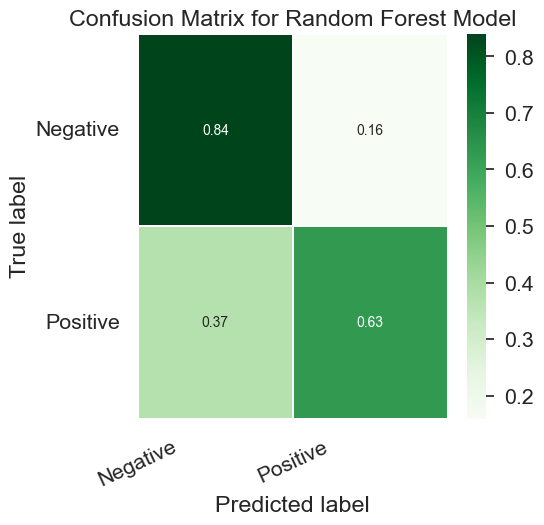

In [143]:
# Get and reshape confusion matrix data
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

matrix = confusion_matrix(c, b)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
# Build the plot
plt.figure(figsize=(5,5))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
# Add labels to the plot
class_names = ['Negative', 'Positive']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()